In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/srv/conda/envs/notebook/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gcd', 'lcm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
pip install deltasigma

Note: you may need to restart the kernel to use updated packages.


In [12]:
python setup.py install

SyntaxError: invalid syntax (<ipython-input-12-6ea3a7c37725>, line 1)

In [13]:
from __future__ import division
from deltasigma import *

In [14]:
OSR = 256
order = 2
H = synthesizeNTF(order, OSR, 1)

/srv/conda/envs/notebook/lib/python3.6/site-packages/deltasigma/_simulateDSM.py:215: UserWarning: Using a slow implementation of simulateDSM
Refer to the docs for how to switch to a fast one
  'Refer to the docs for how to switch to a fast one')
UsageError: Line magic function `%hold(True)` not found.


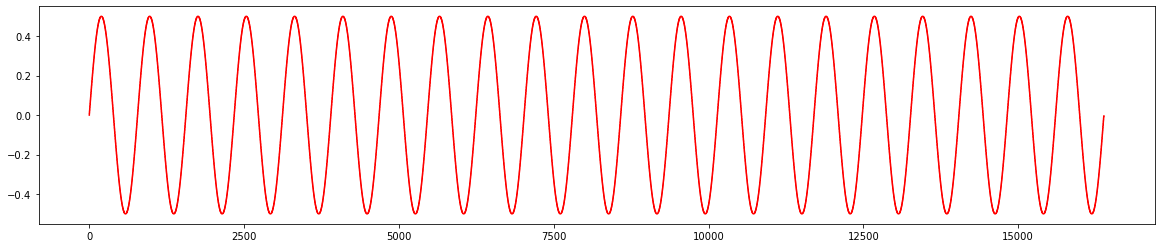

In [15]:
figure(figsize=(20, 4))
N = 16384
fB = int(np.ceil(N/(2.*OSR)))
ftest = np.floor(2./3.*fB)
u = 0.5*np.sin(2*np.pi*ftest/N*np.arange(N))
v, xn, xmax, y = simulateDSM(u, H)
t = np.arange(16384)
step(t, u[t],'r')
%hold(True)
step(t, v[t], 'g')
axis([0, 16384, -1.2, 1.2])
xlabel('Sample Number')
ylabel('u, v')
title('Modulator Input & Output');


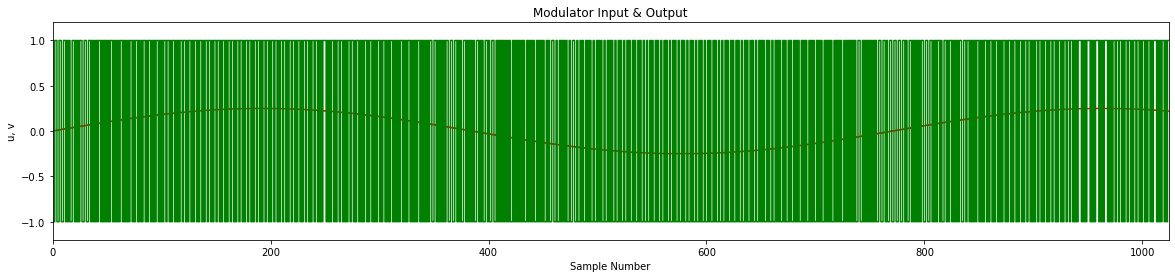

In [20]:
OSR=256
figure(figsize=(20, 4))
N = 65536
fB = int(np.ceil(N/(2.*OSR)))
ftest = np.floor(2./3.*fB)
u = 0.25*np.sin(2*np.pi*ftest/N*np.arange(N))
v, xn, xmax, y = simulateDSM(u, H)
t = np.arange(65536)
step(t, u[t],'r')
#hold(True)
step(t, v[t], 'g')
axis([0, 1024, -1.2, 1.2])
xlabel('Sample Number')
ylabel('u, v')
title('Modulator Input & Output');

UsageError: Line magic function `%hold(True)` not found.


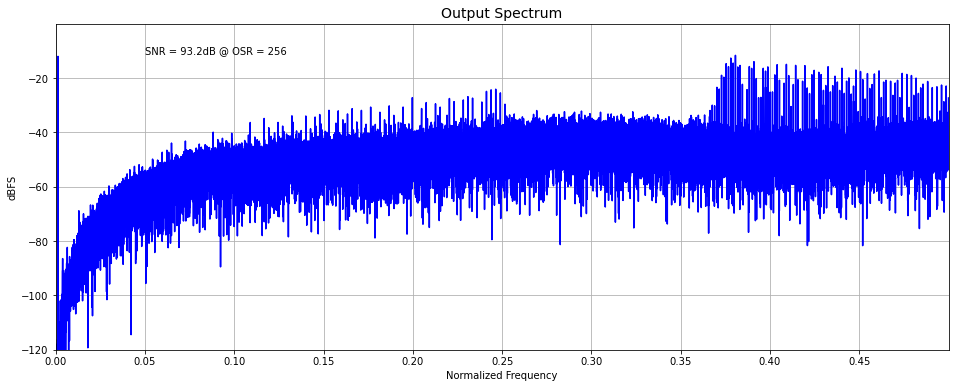

In [21]:
N = 65536
f = np.linspace(0,0.5, 32769)
spec = np.fft.fft(v * ds_hann(N))/(N/4)
plot(f, dbv(spec[:32769]),'b', label='Simulation')
figureMagic([0, 0.5], 0.05, None, [-120, 0], 20, None, (16, 6), 'Output Spectrum')
xlabel('Normalized Frequency')
ylabel('dBFS')
snr = calculateSNR(spec[2:fB+1], ftest - 2)
text(0.05, -10, 'SNR = %4.1fdB @ OSR = %d' % (snr, OSR), verticalalignment='center')
NBW = 1.5/N
Sqq = 4*evalTF(H, np.exp(2j*np.pi*f)) ** 2/3.
%hold(True)
plot(f, dbp(Sqq * NBW), 'm', linewidth=2, label='Expected PSD')
text(0.49, -90, 'NBW = %4.1E x $f_s$' % NBW, horizontalalignment='right')
legend(loc=4);

In [22]:
OSR = 256
order = 2
H = synthesizeNTF(order, OSR,1)
snr_pred, amp_pred, _, _, _ = predictSNR(H, OSR)
snr, amp  = simulateSNR(H, OSR)

/srv/conda/envs/notebook/lib/python3.6/site-packages/scipy/signal/filter_design.py:1626: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


TypeError: slice indices must be integers or None or have an __index__ method

In [63]:
plot(amp_pred, snr_pred, '-', amp, snr, 'og-.')
figureMagic([-100, 0], 10, None, [0, 100], 10, None, (16, 6),'SQNR')
xlabel('Input Level (dBFS)')
ylabel('SQNR (dB)')
pk_snr, pk_amp = peakSNR(snr, amp)
text(-25, 85, 'peak SNR = %4.1fdB\n@ OSR = %d\n' % (pk_snr, OSR), horizontalalignment='right');


NameError: name 'amp_pred' is not defined